In [1]:
from _config import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import colormaps
tab20 = colormaps['tab20']

In [2]:
df = pd.read_excel('data/score.xlsx')
df = df.iloc[:,:5]
df.columns = ['id','name','session','version','num']
df['num'] = df['num'].mask(df['version']=='Absent', np.nan)

df['score'] = df['num'] / 28 * 100

In [3]:
# Mean and std
N = df[df['version']!='Absent'].shape[0]
mean = df.num.mean()
mean_score = df.score.mean()
q1, q2, q3 = df.num.quantile([0.25, 0.5, 0.75])
std = df.num.std()
std_score = df.score.std()
x0 = mean - 2* std
x1 = mean - std 
x2 = mean + std 
x3 = mean + 2 * std

# Mean by session and version
data1 = df[df['version']!='Absent'].groupby(['session'])['score'].mean().map(lambda x: f'{x:.2f}').to_numpy().reshape(4,1)
data2 = df[df['version']!='Absent'].groupby(['version'])['score'].mean().map(lambda x: f'{x:.2f}').to_numpy().reshape(3,1)

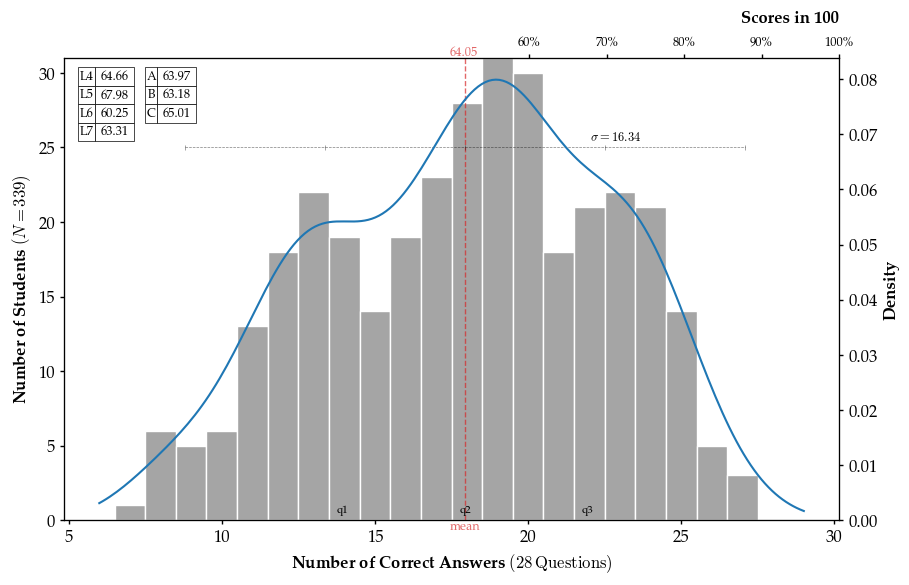

In [ ]:
anchor = 25
f, ax = plt.subplots(figsize = (10, 6))

ax1 = ax.twiny()
ax1.set_xlim(ax.get_xlim())
ax.set_ylim(0, 31)
ax1.set_xticks([i*28 for i in [0.6, 0.7, 0.8, 0.9, 1]])
ax1.set_xticklabels(['60%', '70%', '80%', '90%', '100%' ], fontsize = 9)

ax2 = ax.twinx()

sns.histplot(df['num'], color = tab20(14), alpha = 0.7, kde = False, ec = 'white', discrete = True, ax = ax)
sns.kdeplot(data = df, x='num', color = tab20(0), ax = ax2, clip = (6,29))

# Vertical and horizontal lines
ax.vlines(mean, 0, 31, linestyle = '--', linewidth = 1, color = tab20(6),  alpha = 0.7)

ax.hlines(anchor, x0, x3, linestyle = '--', linewidth = 0.5, color = 'black', alpha = 0.5)

for i in [x0, x1, mean, x2, x3]:
    ax.vlines(i, anchor - 0.2, anchor + 0.2, linestyles = 'solid', linewidth = 0.5, color = 'black', alpha = 0.5)

# Annotation
ax.annotate('mean', xy = (mean,0), xytext = (mean-0.5, -0.6), color = tab20(6),  alpha = 0.7, fontsize = 9)
ax.annotate(f'{mean_score:.2f}', xy = (mean,0), xytext = (mean-0.5, 31.2), color = tab20(6),  alpha = 0.7, fontsize = 9)

ax.annotate(rf'$\sigma={std_score:.2f}$', xy = (x2, anchor), xytext = (x2-0.5, anchor + 0.5), color = 'black', fontsize = 9)

for i, j in zip(['q1','q2','q3'], [q1, q2, q3]):
    ax.annotate(i, xy = (j,0), xytext = (j-0.25, 0.5), color = 'black', fontsize = 8)

# Tables
table1 = ax.table(data1, cellLoc = 'center', rowLabels = ['L4','L5','L6','L7'], bbox = [0.04, 0.82, 0.05, 0.16])
table1.auto_set_font_size(False)  # Disable automatic font size
table1.set_fontsize(9)            # Set font size
for key, cell in table1.get_celld().items():
    cell.set_edgecolor('black')    # Set border color
    cell.set_linewidth(0.5)  
    cell.set_text_props(ha = 'center', va = 'center')


table2 = ax.table(data2, cellLoc = 'center', rowLabels = ['A','B','C'], bbox = [0.12, 0.86, 0.05, 0.12])
table2.auto_set_font_size(False)  
table2.set_fontsize(9)            
for key, cell in table2.get_celld().items():
    cell.set_edgecolor('black')    
    cell.set_linewidth(0.5)  
    cell.set_text_props(ha = 'center', va = 'center')

# Axis labels
ax.set_xlabel(r'Number of Correct Answers $(28\, \text{Questions})$', fontsize = 12, fontweight = 'bold')
ax.set_ylabel(rf'Number of Students $(N={N})$', fontsize = 12, fontweight = 'bold')

ax1.set_xlabel('Scores in 100', loc = 'right', fontsize = 12, fontweight = 'bold', labelpad = 10)

ax2.set_ylabel('Density', fontsize = 12, fontweight = 'bold')

plt.show()   

# Output
f.savefig('figures/midterm_score_dist.png', format = 'png', dpi = 1000, bbox_inches = 'tight')